In [1]:
""" Inflation Prediction Study
Author: Camilla Nore
Date:   2015-08-30
"""
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

%matplotlib notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# NB: As this is iPython, the module will be cached. If you change 
#     the module, you have to restart the iPython kernel.
from inflastudy import InflaData  # Custom module for this study.
from inflastudy import decode_column_name # Decode column name

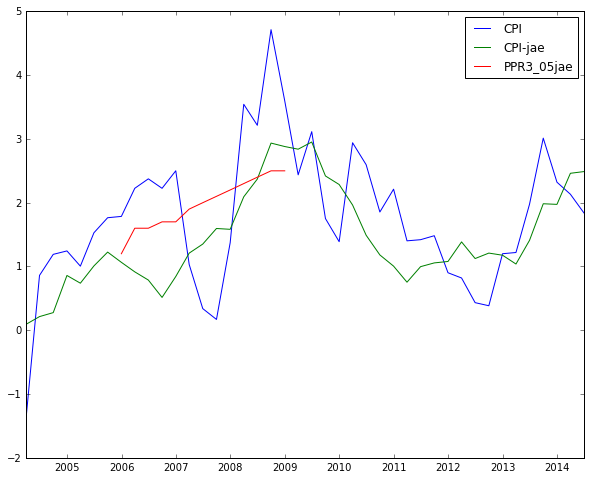

In [2]:
""" Load the data file"""

data = InflaData.InflaData(filename='data/kongepanel_upd_ark_A.csv')
#print data.raw_data.CPI       # Uncomment this line to see raw CPI data.
#print data.raw_data.columns   # Uncomment this line to see column names.

# Column names with special characters can be accessed as object members, e.g.: raw_data.CPI
plt.plot(data.raw_data.index, data.raw_data.CPI,label='CPI')
plt.hold(True)

# Column names with special characters need to be accessed by key, e.g.: raw_data['CPI-jae']
plt.plot(data.raw_data.index, data.raw_data['CPI-jae'],    label='CPI-jae')
plt.plot(data.raw_data.index, data.raw_data['PPR3_05jae'], label='PPR3_05jae')
plt.legend()

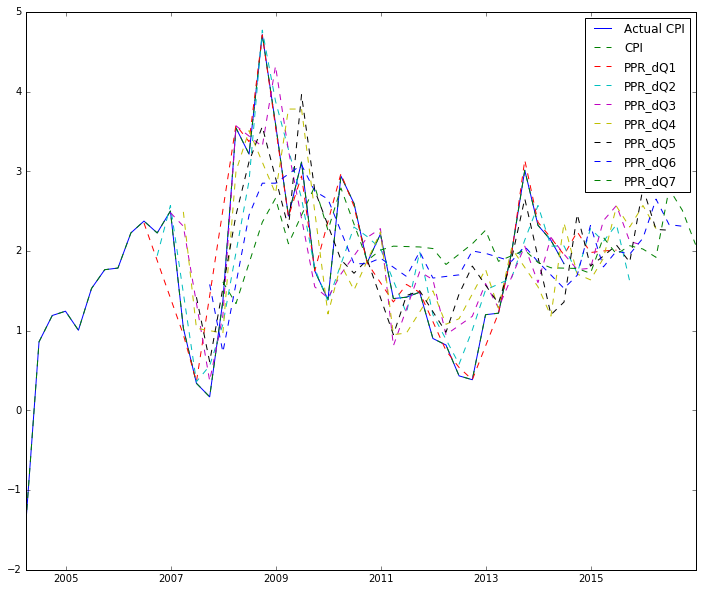

In [3]:
""" Do initial testing with the relative data set on CPI """

data.remap_to_relative_time(prediction_horizon=16)
plt.figure('Predictions', figsize=(12,10))
plt.plot(data.raw_data.index,data.raw_data.CPI,label='Actual CPI')
plot_only_the_first_quarters = 6
for i, col_name in enumerate(data.cpi_pred_relative):
    only_valid_data = np.isfinite(data.cpi_pred_relative[col_name])
    plt.plot(data.cpi_pred_relative.index[only_valid_data],
         data.cpi_pred_relative.loc[only_valid_data,col_name],
         '--', label=col_name)
    if i > plot_only_the_first_quarters:
        break  # Will stop the for loop.
        
plt.legend()
plt.savefig('fig.png')

#print data.cpi_pred_relative
data.cpi_pred_relative.to_csv('relative_data.csv',na_rep='')

Index(['PPR_dQ1_err', 'PPR_dQ2_err', 'PPR_dQ3_err', 'PPR_dQ4_err',
       'PPR_dQ5_err', 'PPR_dQ6_err', 'PPR_dQ7_err', 'PPR_dQ8_err',
       'PPR_dQ9_err', 'PPR_dQ10_err', 'PPR_dQ11_err', 'PPR_dQ12_err',
       'PPR_dQ13_err', 'PPR_dQ14_err', 'PPR_dQ15_err', 'PPR_dQ16_err'],
      dtype='object')


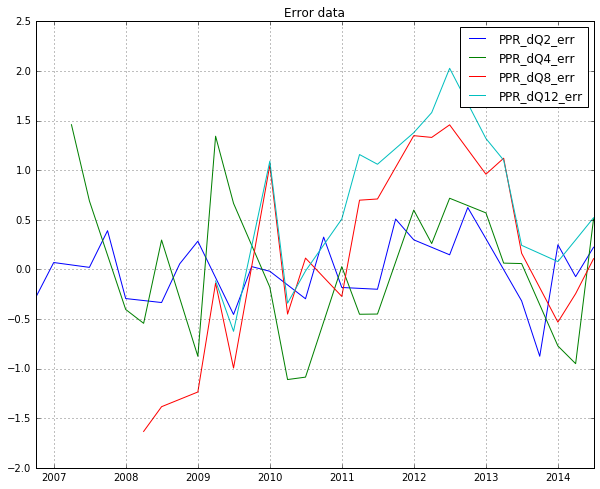

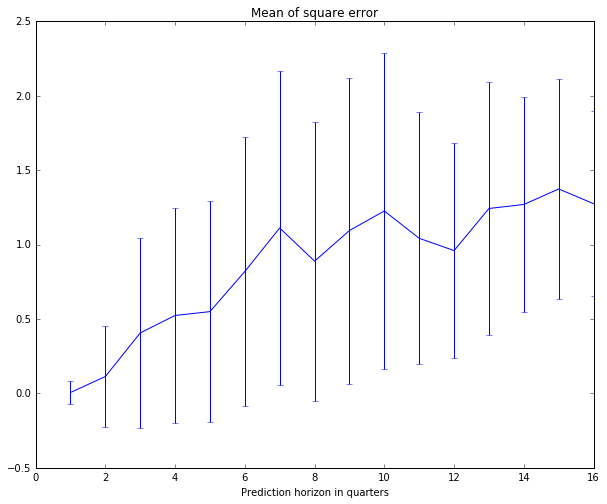

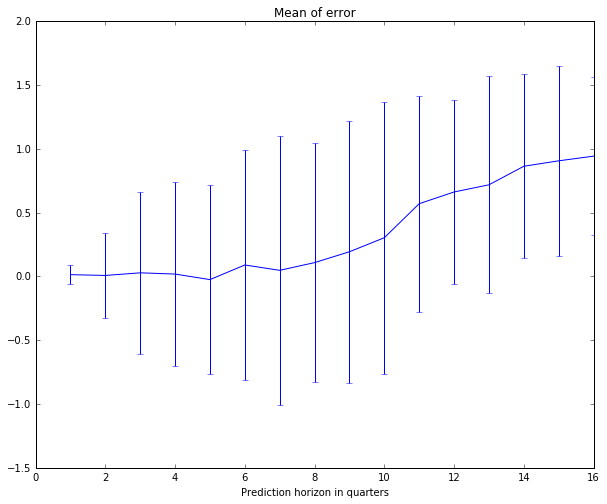

In [35]:
""" What is the prediction error as a function of prediction horizon. """

# Empty dataframe for error
data.cpi_pred_error = pd.DataFrame(index=data.cpi_pred_relative.index)

# Loop the cpi predictions
for i, col_name in enumerate(data.cpi_pred_relative.columns):
    if 'CPI' in col_name:  # Skip the CPI column
        continue
    err_name = col_name + '_err'
    data.cpi_pred_error[err_name] = (
        data.cpi_pred_relative[col_name] - data.cpi_pred_relative.CPI)
print(data.cpi_pred_error.columns)
selected_columns = ['PPR_dQ2_err', 'PPR_dQ4_err', 'PPR_dQ8_err', 'PPR_dQ12_err',]
# Plot the error data, with connected lines
for i, col_name in enumerate(data.cpi_pred_error):
    only_valid_data = np.isfinite(data.cpi_pred_error[col_name])
    if col_name in selected_columns:
        style = '-'
        label = col_name
    else:
        style = '--'
        label = None
        continue #If we want to completely skip these.
    plt.plot(data.cpi_pred_error.index[only_valid_data],
         data.cpi_pred_error.loc[only_valid_data,col_name],
         style, label=label)
plt.title('Error data')
plt.grid()
plt.legend()

# Find the mean, squaremean and std of the error.
pred_error_sqmean = data.cpi_pred_error.apply(np.square).apply(np.mean)
pred_error_mean = data.cpi_pred_error.apply(np.mean)
pred_error_std = data.cpi_pred_error.apply(np.std)
horizon_range = range(1,len(pred_error_absmean.index)+1)
plt.figure('Mean of square error')
plt.title('Mean of square error')
plt.errorbar(horizon_range,           # The x-axis
             pred_error_sqmean[:],   # The line
             yerr=pred_error_std)     # The error bars
plt.xlabel('Prediction horizon in quarters')
plt.figure('Mean of error')
plt.title('Mean of error')
plt.errorbar(horizon_range,           # The x-axis
             pred_error_mean[:],   # The line
             yerr=pred_error_std)     # The error bars
plt.xlabel('Prediction horizon in quarters')

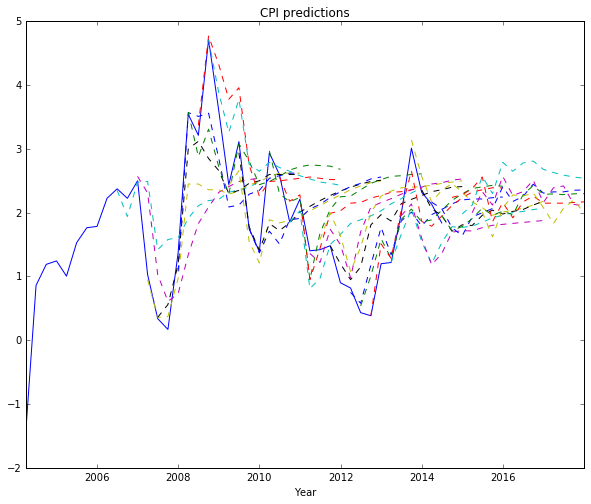

In [22]:
""" Plot all CPI predictions and the actual CPI. """

plt.figure('CPI predictions', figsize=(10,8))  # Larger plot.
plt.title('CPI predictions')
plt.xlabel('Year')
# Plot the actual CPI as a solid line.
plt.plot(data.raw_data.index,
         data.raw_data['CPI'],
         label ='CPI')

for col_name in data.cpi_predictions:
    plt.plot(data.cpi_predictions.index,
             data.cpi_predictions[col_name],
             '--',
             label = 'col_name')

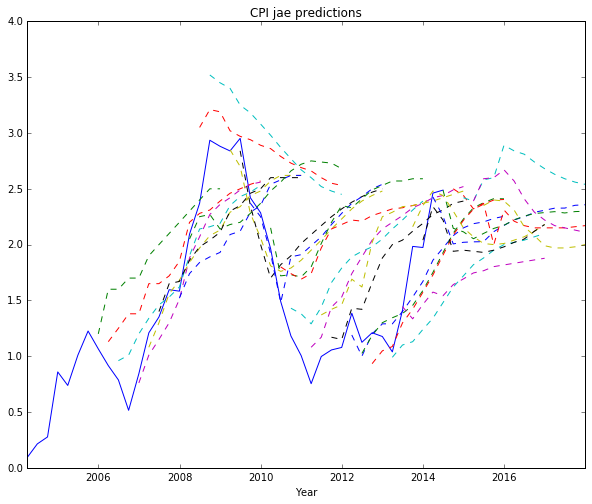

In [16]:
""" Plot all CPI-jae predictions and the actual CPI-jae. """

plt.figure('CPI jae predictions', figsize=(10,8))  # Larger plot.
plt.title('CPI jae predictions')
plt.xlabel('Year')

# Plot the actual CPI as a solid line.
plt.plot(data.raw_data.index,
         data.raw_data['CPI-jae'],
         label ='CPI jae')

for col_name in data.cpi_jae_predictions:
    plt.plot(data.cpi_jae_predictions.index,
             data.cpi_jae_predictions[col_name],
             '--',
             label = 'col_name')


In [18]:
# Test the InflaData class

import numpy as np
import nose.tools
from inflastudy import InflaData
k_first_t_in_data = '2006-03-31'
k_test_data = 'tests/test_data_input.csv'


def test_init():
    """ Test creating an empty object"""
    data = InflaData.InflaData()
    assert data is not None


def test_init_with_data():
    """ Test loading data_file. """
    data = InflaData.InflaData(k_test_data)
    # Verify that the first line of data is read correctly.
    nose.tools.eq_(data.raw_data.index[0],
                   np.datetime64(k_first_t_in_data),
                   'First line date does not match')
    print('Successfully loaded test data: \n', data.raw_data)
    
test_init_with_data()

Successfully loaded test data: 
             PPR2_06cpi  PPR3_06cpi  PPR1_07cpi  PPR2_07cpi       CPI
t                                                                   
2006-03-31         NaN         NaN         NaN         NaN  2.226068
2006-06-30        2.35         NaN         NaN         NaN  2.374457
2006-09-30        1.94         NaN         NaN         NaN  2.225729
2006-12-31        2.48        2.57         NaN         NaN  2.500711
2007-03-31        2.49        2.31        0.95         NaN  1.031220
2007-06-30         NaN        1.03        0.36        0.36  0.339463
2007-09-30         NaN        0.61        0.37        0.56  0.169635
2007-12-31         NaN         NaN        0.97        1.19  1.373804
2008-03-31         NaN         NaN         NaN        3.00  3.543511


In [8]:
testdata = InflaData.InflaData(filename='tests/test_data_input.csv')
testdata.remap_to_relative_time()
print(testdata.raw_data)
print(testdata.cpi_pred_relative)

            PPR2_06cpi  PPR3_06cpi  PPR1_07cpi  PPR2_07cpi       CPI
t                                                                   
2006-03-31         NaN         NaN         NaN         NaN  2.226068
2006-06-30        2.35         NaN         NaN         NaN  2.374457
2006-09-30        1.94         NaN         NaN         NaN  2.225729
2006-12-31        2.48        2.57         NaN         NaN  2.500711
2007-03-31        2.49        2.31        0.95         NaN  1.031220
2007-06-30         NaN        1.03        0.36        0.36  0.339463
2007-09-30         NaN        0.61        0.37        0.56  0.169635
2007-12-31         NaN         NaN        0.97        1.19  1.373804
2008-03-31         NaN         NaN         NaN        3.00  3.543511
                 CPI  PPR_dQ1  PPR_dQ2  PPR_dQ3  PPR_dQ4  PPR_dQ5  PPR_dQ6  \
t                                                                            
2006-03-31  2.226068      NaN      NaN      NaN      NaN      NaN      NaN   
2006-06